task 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic_data = pd.read_csv('titanic.csv')


print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
print("\n=== Task 1 ===")

print(titanic_data.describe())
print(titanic_data.shape)
print(titanic_data.info())


=== Task 1 ===
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 e

#task 2

In [4]:
print("\n=== Task 2 ===")

missing_values = titanic_data.isnull().sum()
print(missing_values)


=== Task 2 ===
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#task 3


=== Task 3 ===


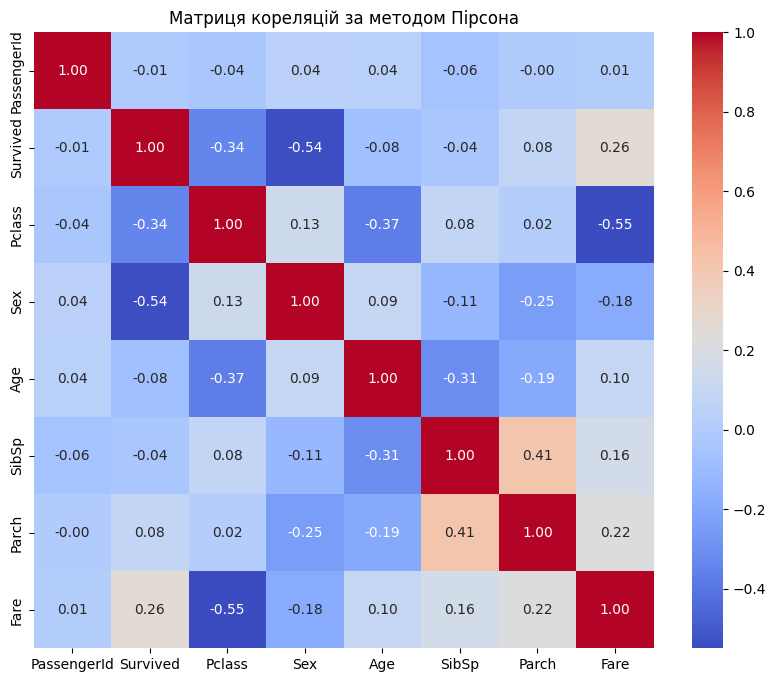

In [5]:
print("\n=== Task 3 ===")
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 1, 'female': 0})
embarked_dummies = pd.get_dummies(titanic_data['Embarked'], prefix='Embarked')
titanic_data = pd.concat([titanic_data, embarked_dummies], axis=1)
titanic_data.drop('Embarked', axis=1, inplace=True)

#Обчислення матриці кореляцій
correlation_matrix = titanic_data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Матриця кореляцій за методом Пірсона')
plt.show()


#task 4

In [ ]:
print("\n=== Task 4 ===")
def fill_missing_with_median_by_group(df, column_name, group_columns):
    medians = df.groupby(group_columns)[column_name].median()
    
    def fill_median(row):
        if pd.isna(row[column_name]):
            return medians[tuple(row[group_columns])]  
        else:
            return row[column_name]

    df[column_name] = df.apply(fill_median, axis=1)
    return df

updated_titanic = fill_missing_with_median_by_group(titanic_data, 'Age', ['Pclass', 'Sex'])
missing_values_after = updated_titanic.isnull().sum()
print(missing_values_after)




=== Task 4 ===
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64


#task 5


=== Task 5 ===


C:\Users\Liudmyla Rybak\AppData\Local\Temp\ipykernel_34944\1146557539.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = titanic_data.groupby('Age_bin')['Survived'].sum()
C:\Users\Liudmyla Rybak\AppData\Local\Temp\ipykernel_34944\1146557539.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_age_group.index, y=survival_by_age_group.values, palette='coolwarm')


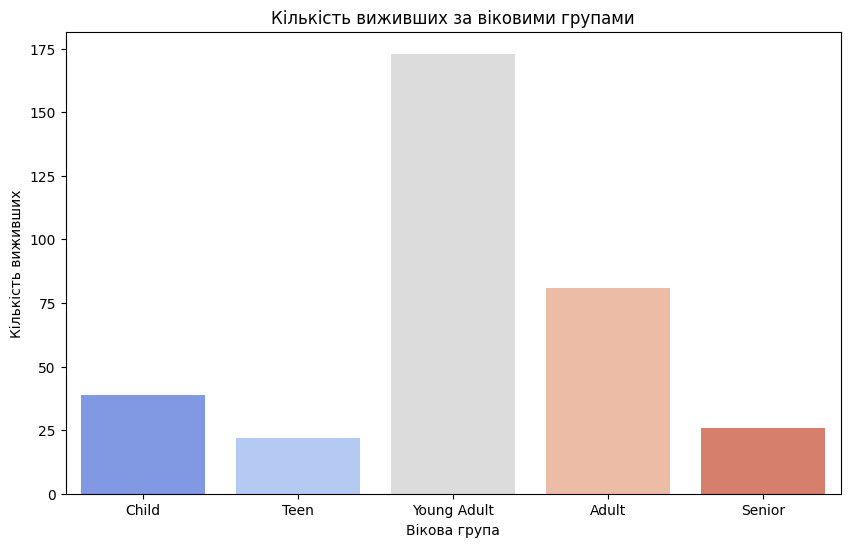

In [10]:
print("\n=== Task 5 ===")

bins = [0, 12, 18, 35, 50, 80]  # age ranges
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']  

titanic_data['Age_bin'] = pd.cut(titanic_data['Age'], bins=bins, labels=labels, right=False)
survival_by_age_group = titanic_data.groupby('Age_bin')['Survived'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=survival_by_age_group.index, y=survival_by_age_group.values, palette='coolwarm')
plt.title('Кількість виживших за віковими групами')
plt.xlabel('Вікова група')
plt.ylabel('Кількість виживших')
plt.show()


#task 6


=== Task 6 ===


C:\Users\Liudmyla Rybak\AppData\Local\Temp\ipykernel_34944\115700366.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare = titanic_data.groupby('Fare_bin')['Survived'].sum()
C:\Users\Liudmyla Rybak\AppData\Local\Temp\ipykernel_34944\115700366.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_fare.index, y=survival_by_fare.values, palette='coolwarm')


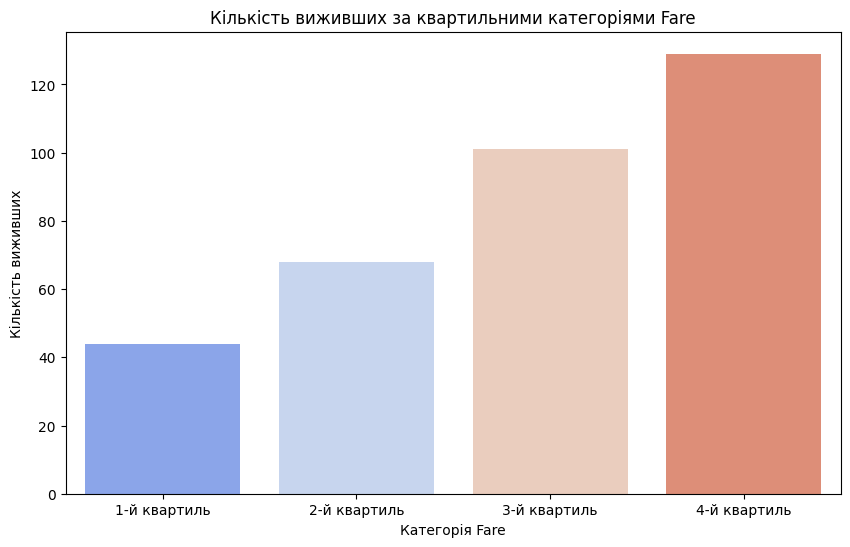

In [11]:
print("\n=== Task 6 ===")

titanic_data['Fare_bin'] = pd.qcut(titanic_data['Fare'], q=4, labels=['1-й квартиль', '2-й квартиль', '3-й квартиль', '4-й квартиль'])

survival_by_fare = titanic_data.groupby('Fare_bin')['Survived'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=survival_by_fare.index, y=survival_by_fare.values, palette='coolwarm')
plt.title('Кількість виживших за квартильними категоріями Fare')
plt.xlabel('Категорія Fare')
plt.ylabel('Кількість виживших')
plt.show()

#task 7


=== Task 7 ===


C:\Users\Liudmyla Rybak\AppData\Local\Temp\ipykernel_34944\1038368346.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Family_size', y='Survived', data=titanic_data, palette='coolwarm')


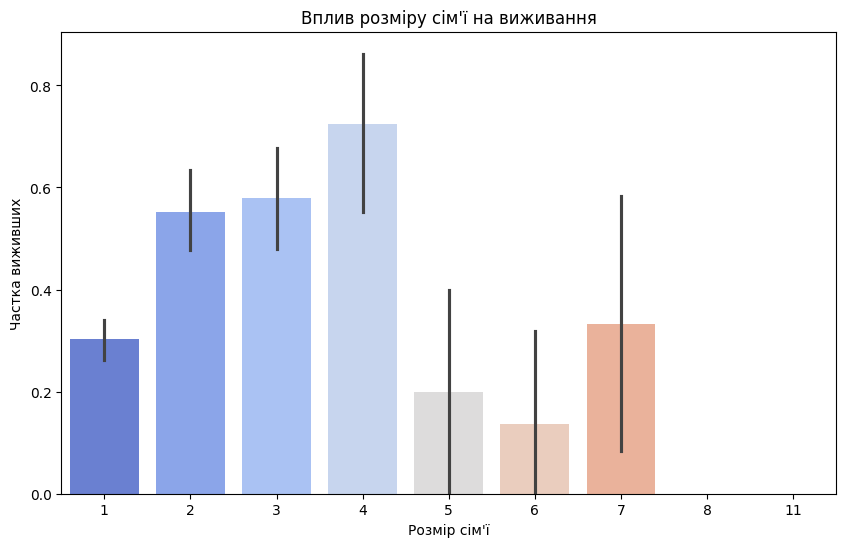

In [13]:
print("\n=== Task 7 ===")

titanic_data['Family_size'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

plt.figure(figsize=(10, 6))
sns.barplot(x='Family_size', y='Survived', data=titanic_data, palette='coolwarm')
plt.title('Вплив розміру сім\'ї на виживання')
plt.xlabel('Розмір сім\'ї')
plt.ylabel('Частка виживших')
plt.show()

# Task 8

In [14]:
print("\n=== Task 8 ===")
titanic_data.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)
print(titanic_data.head())


=== Task 8 ===
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    1  22.0      1      0   7.2500   
1            2         1       1    0  38.0      1      0  71.2833   
2            3         1       3    0  26.0      0      0   7.9250   
3            4         1       1    0  35.0      1      0  53.1000   
4            5         0       3    1  35.0      0      0   8.0500   

   Embarked_C  Embarked_Q  Embarked_S      Age_bin      Fare_bin  Family_size  
0       False       False        True  Young Adult  1-й квартиль            2  
1        True       False       False        Adult  4-й квартиль            2  
2       False       False        True  Young Adult  2-й квартиль            1  
3       False       False        True        Adult  4-й квартиль            2  
4       False       False        True        Adult  2-й квартиль            1  


#task 9,10

In [17]:
print("\n=== Task 9 , 10===")
titanic_data = pd.read_csv('titanic.csv')
titanic_data['Title'] = titanic_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)


title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 8,
                 "Mlle": 9, "Countess": 10, "Ms": 11, "Lady": 12, "Jonkheer": 13, "Don": 14, "Dona": 15,
                 "Mme": 16, "Capt": 17, "Sir": 18}
titanic_data['Title'] = titanic_data['Title'].map(title_mapping).fillna(0)


titanic_data.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

print(titanic_data.head())



=== Task 9 , 10===
   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  Title  \
0            1         0       3    male  22.0      1      0   7.2500      1   
1            2         1       1  female  38.0      1      0  71.2833      3   
2            3         1       3  female  26.0      0      0   7.9250      2   
3            4         1       1  female  35.0      1      0  53.1000      3   
4            5         0       3    male  35.0      0      0   8.0500      1   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


Task 11


=== Task 11 ===


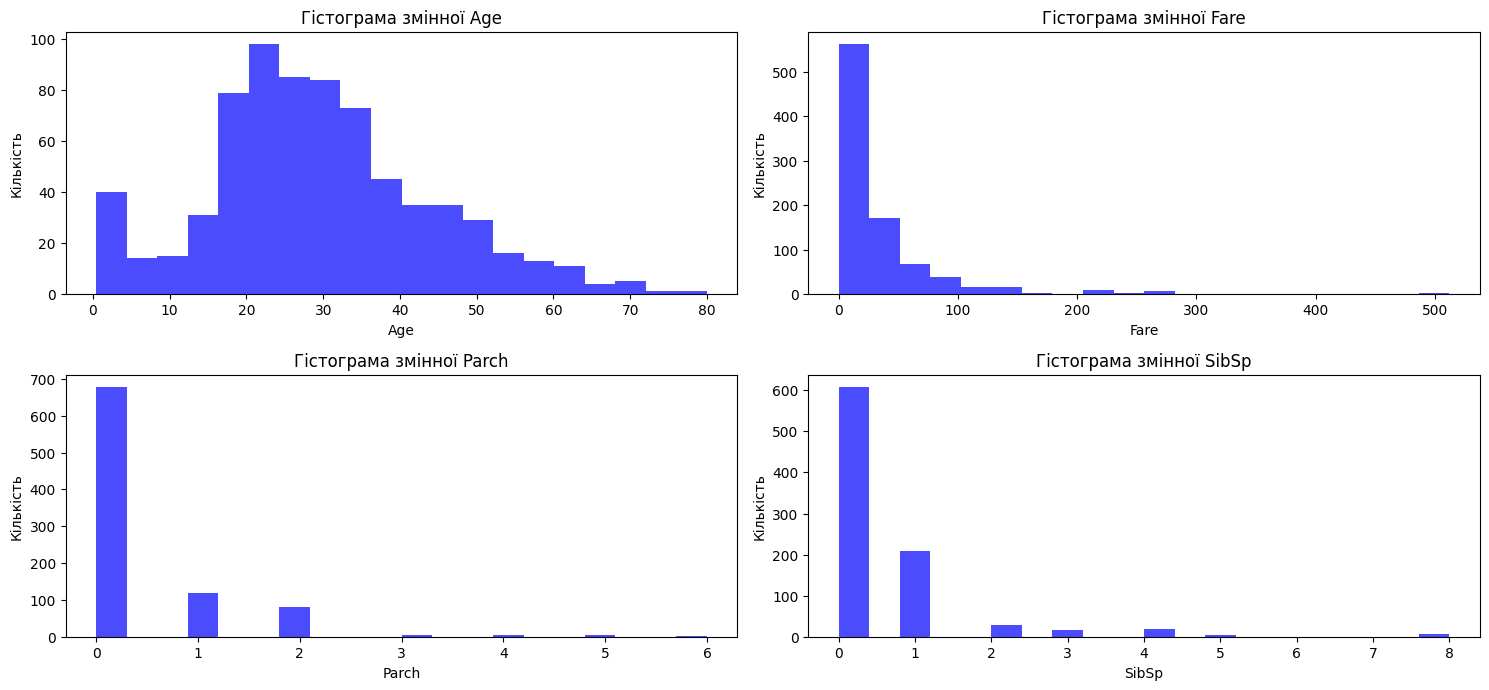

In [ ]:
print("\n=== Task 11 ===")
numeric_vars = ['Age', 'Fare', 'Parch', 'SibSp']
if 'Family_size' in titanic_data.columns:
    numeric_vars.append('Family_size') 

plt.figure(figsize=(15, 10))
for i, var in enumerate(numeric_vars):
    plt.subplot(3, 2, i + 1)
    plt.hist(titanic_data[var].dropna(), bins=20, color='blue', alpha=0.7)
    plt.title(f'Гістограма змінної {var}')
    plt.xlabel(var)
    plt.ylabel('Кількість')
plt.tight_layout()
plt.show()

#task 12


=== Task 12 ===


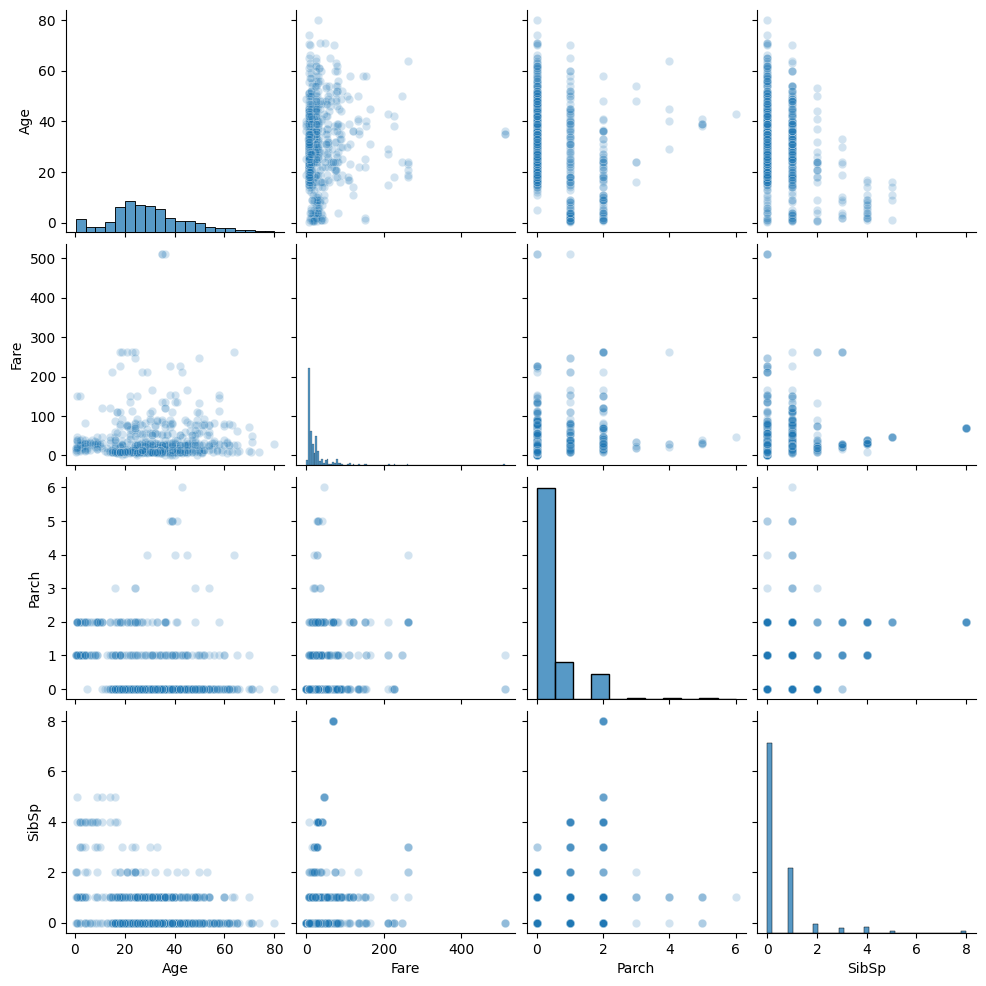

In [21]:
print("\n=== Task 12 ===")
sns.pairplot(titanic_data[numeric_vars], plot_kws={'alpha':0.2})
plt.show()